In [7]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
df =  pd.concat(
    map(pd.read_csv, ["../BITS PILANI FINAL PROJECT/2007.csv", "../BITS PILANI FINAL PROJECT/2008.csv"]), ignore_index=True)
print('Dataframe dimensions:', df.shape)


Dataframe dimensions: (14462943, 29)


In [9]:
airlines_names  = pd.read_csv("../BITS PILANI FINAL PROJECT/airlines.csv")
airlines_names

,UniqueCarrier,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [10]:
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['DepDelay'].groupby(df['UniqueCarrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

df_delayplot=pd.merge(global_stats, airlines_names, on='UniqueCarrier')

df_delayplot.head()


,UniqueCarrier,min,max,count,mean,AIRLINE
0,HA,-534.0,1317.0,117200.0,-0.183473,Hawaiian Airlines Inc.
1,F9,-90.0,887.0,192824.0,6.672707,Frontier Airlines Inc.
2,AS,-305.0,947.0,306606.0,8.846034,Alaska Airlines Inc.
3,B6,-70.0,1048.0,380643.0,13.682080,JetBlue Airways
4,EV,-165.0,1002.0,552920.0,16.084546,Atlantic Southeast Airlines


In [11]:
for dataset in df_delayplot:
    df_delayplot.loc[df_delayplot['mean'] < 0, 'NewMean'] = 0
    df_delayplot.loc[df_delayplot['mean'] >= 0, 'NewMean'] = df_delayplot['mean']
    
df_delayplot.head()

,UniqueCarrier,min,max,count,mean,AIRLINE,NewMean
0,HA,-534.0,1317.0,117200.0,-0.183473,Hawaiian Airlines Inc.,0.000000
1,F9,-90.0,887.0,192824.0,6.672707,Frontier Airlines Inc.,6.672707
2,AS,-305.0,947.0,306606.0,8.846034,Alaska Airlines Inc.,8.846034
3,B6,-70.0,1048.0,380643.0,13.682080,JetBlue Airways,13.682080
4,EV,-165.0,1002.0,552920.0,16.084546,Atlantic Southeast Airlines,16.084546


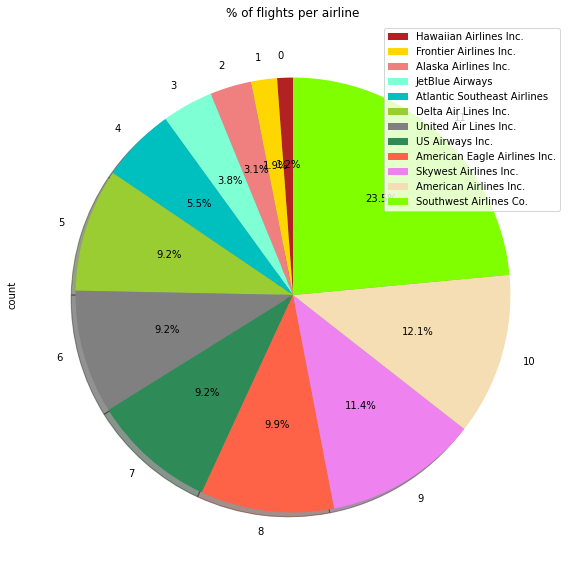

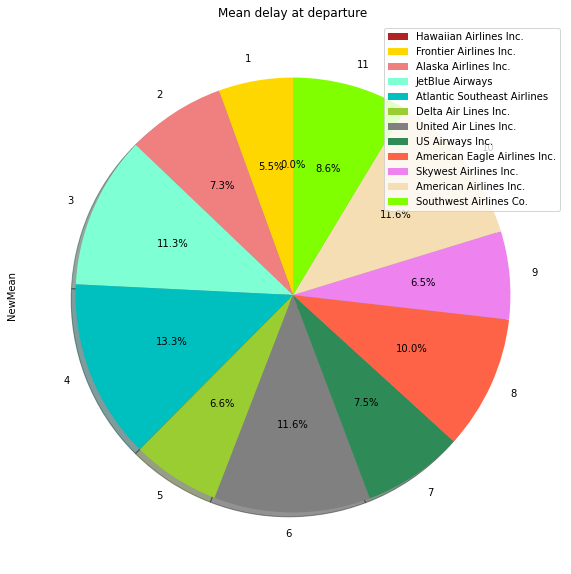

In [29]:
from matplotlib.gridspec import GridSpec

Colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

ax1= df_delayplot.plot.pie(y='count', title="% of flights per airline",colors = Colors, legend=True, \
                   autopct='%1.1f%%',shadow=True, startangle=90,figsize=(20,10))

ax1.legend(labels=df_delayplot['AIRLINE'],loc='best')
plt.pie(df_delayplot['count'],labels=df_delayplot['UniqueCarrier'])
plt.show()

ax2= df_delayplot.plot.pie(y='NewMean', title="Mean delay at departure", colors = Colors, legend=True, \
                   autopct='%1.1f%%',shadow=True, startangle=90,figsize=(20,10))

ax2.legend(labels=df_delayplot['AIRLINE'],loc='best')
plt.pie(df_delayplot['NewMean'],labels=df_delayplot['UniqueCarrier'])
plt.show()



In [26]:
df_delayplot3=pd.merge(df, airlines_names, on='UniqueCarrier')
df_delayplot3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10189128 entries, 0 to 10189127
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay    

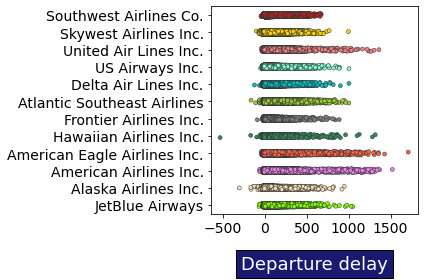

In [17]:
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="AIRLINE", x="DepDelay", size = 4, palette = colors,
                    data=df_delayplot3, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
#ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
#                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 

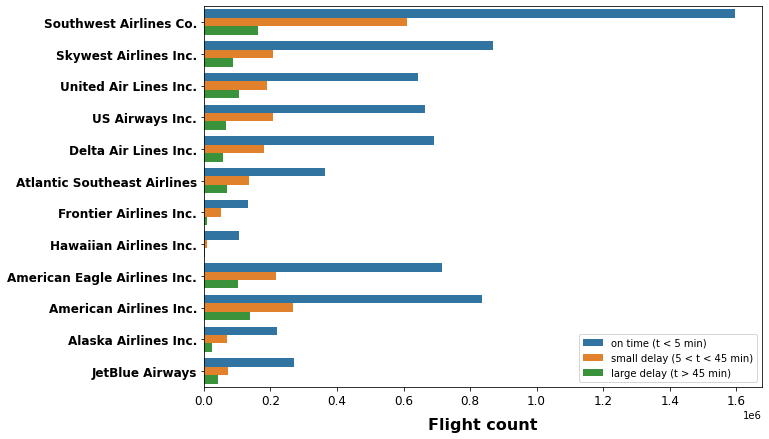

In [20]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df_delayplot3['DELAY_LEVEL'] = df_delayplot3['DepDelay'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df_delayplot3)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
#labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
#ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()